The purpose of this notebook is to generate sampling masks used for retrospective under-sampling of single channel images. Various acceleration factors are represented here (i.e. R=5x,10x,15x). A poisson disc distribution is used where the radius of the k-space is fully sampled.  

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sys
import nibabel as nib
import glob
# Add my modules to path
MY_UTILS_PATH = "../src/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)

# import my modules    
import sampling

In [2]:
pattern_shape = (512,512) #dimensions of desired sampling pattern

For the case of 5x, one fifth of the data is sampled (20%)

In [3]:
p_5x = sampling.poisson_disc_pattern(pattern_shape,center = True,radius = 50, k  = 10, r = 1.78)
print("5x:",p_5x.sum()/p_5x.size)

5x: 0.20932388305664062


In [4]:
p_10x = sampling.poisson_disc_pattern(pattern_shape,center = True,radius = 40, k  = 10, r = 2.66)
print("10x:",p_10x.sum()/p_10x.size)

10x: 0.10036087036132812


In [5]:
p_15x = sampling.poisson_disc_pattern(pattern_shape,center = True,radius = 30, k  = 10, r = 3.2)
print("15x:",p_15x.sum()/p_15x.size)

15x: 0.06749343872070312


Plot of masks for each acceleration factor

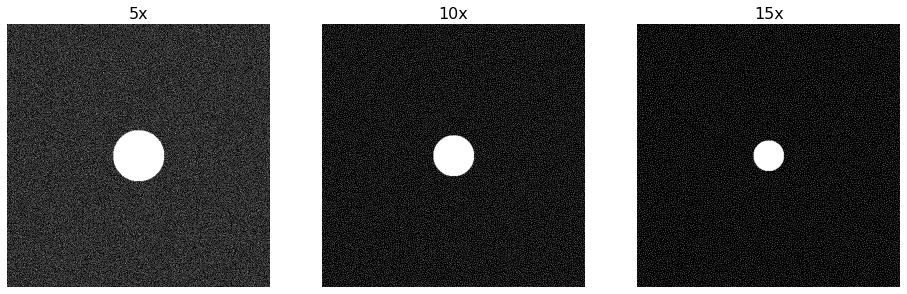

<Figure size 432x288 with 0 Axes>

In [6]:
fig = plt.figure(figsize=(16,10))
plt.subplot(131)
plt.imshow(p_5x,cmap = "gray")
plt.axis("off")
plt.title("5x",size=16, color='black')
plt.subplot(132)
plt.imshow(p_10x, cmap='gray')
plt.axis("off")
plt.title("10x", size=16, color='black')
plt.subplot(133)
plt.imshow(p_15x,cmap='gray')
plt.axis("off")
plt.title("15x", size=16, color='black')
plt.show()
plt.tight_layout()
#fig.savefig('../figures/sampling.png',dpi=300)

In [7]:
#load scan to show example of zero-filled reconstruction
file_path= glob.glob('/home/youssef/Desktop/data/brain-cancer/*.nii')[0]
print(file_path)

/home/youssef/Desktop/data/brain-cancer/TUM25-20190910.nii


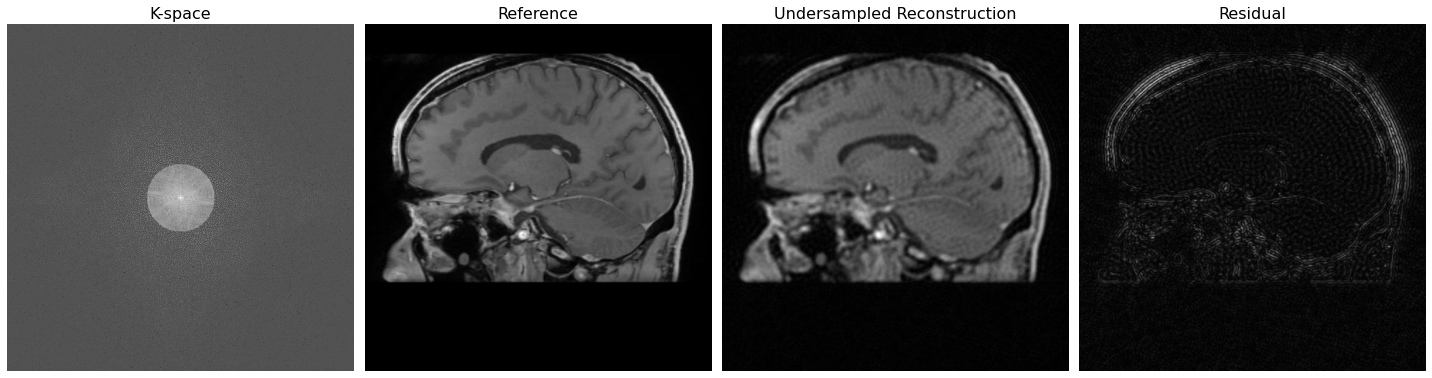

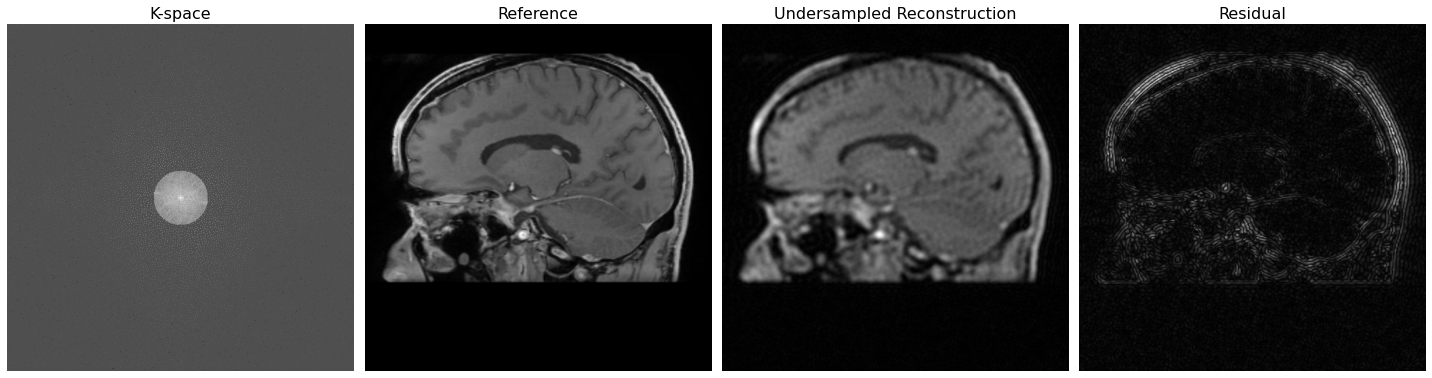

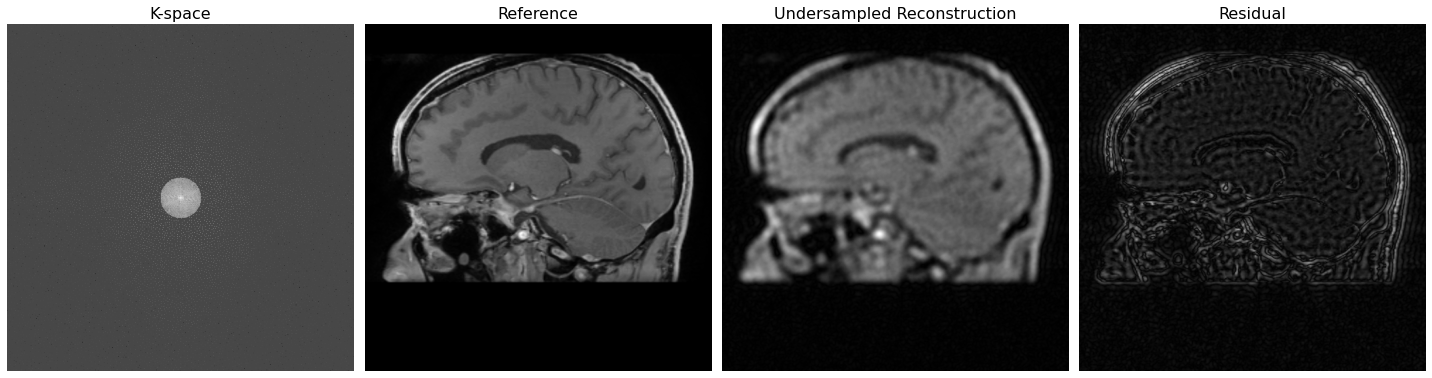

In [8]:
#plot of the three sampling masks corresponding to each acceleration factor 
R = ['5x','10x','15x']
for ii,p in enumerate([p_5x,p_10x,p_15x]):
    rec = nib.load(file_path).get_fdata()
    rec = np.swapaxes(rec,0,2) / np.abs(rec).max()
    kspace = np.fft.fft2(rec)
    kspace[:,np.fft.fftshift(~p)] = 0
    rec_back = np.fft.ifft2(kspace)
    rec_back = rec_back / np.abs(rec_back).max()
    fig = plt.figure(figsize=(20,10))
    plt.subplot(141)
    plt.title('K-space', size=16, color='black')
    plt.axis('off')
    plt.imshow(np.log(np.abs(1+np.fft.fftshift(kspace[100]))), cmap='gray')
    plt.subplot(142)
    plt.title('Reference', size=16, color='black')
    plt.axis('off')
    plt.imshow(rec[100], cmap='gray')
    plt.subplot(143)
    plt.title('Undersampled Reconstruction', size=16, color='black')
    plt.axis('off')
    plt.imshow(np.abs(rec_back[100]), cmap='gray')
    plt.subplot(144)
    plt.title('Residual', size=16, color='black')
    plt.axis('off')
    plt.imshow(np.abs(rec_back[100]-rec[100]), cmap='gray')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout()
    #fig.savefig(f'../figures/sampling_examples_{R[ii]}.png',dpi=300)

Generate an array of 100 sampling masks for each acceleration factor

In [9]:
var_sampling = []
for i in range(100):
    var_sampling.append(sampling.poisson_disc_pattern(pattern_shape,center = True,radius = 50, k  = 10, r = 1.78))

np.save('../data/R5_512x512_poisson_center_true_radius_50_r_1.78.npy', np.array(var_sampling))

In [10]:
var_sampling = []
for i in range(100):
    var_sampling.append(sampling.poisson_disc_pattern(pattern_shape,center = True,radius = 40, k  = 10, r = 2.66))

np.save('../data/R10_512x512_poisson_center_true_radius_40_r_2.66.npy', np.array(var_sampling))

In [11]:
var_sampling = []
for i in range(100):
    var_sampling.append(sampling.poisson_disc_pattern(pattern_shape,center = True,radius = 30, k  = 10, r = 3.2))

np.save('../data/R15_512x512_poisson_center_true_radius_30_r_3.2.npy', np.array(var_sampling))